In [0]:
# import packages
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# read .tsv files
columns = {0:'ID', 1:'label', 2:'statement', 3:'subject', 4:'speaker', 5:'job_title',
          6:'state', 7:'party', 8:'barely_true', 9:'false', 10:'half_true', 11:'mostly_true',
          12:'pants_on_fire', 13:'context'}

def readTsvFile(file_name):
  tsv_file = open(file_name)
  read_tsv = csv.reader(tsv_file, delimiter='\t')
  dataset = []
  for row in read_tsv:
    dataset.append(row)

  print('examples:', len(dataset))
  print('features:', len(dataset[0]))
  print('row1_example:', dataset[0])
  print('\n')

  return dataset

In [3]:
train_dataset = readTsvFile('train.tsv')
val_dataset = readTsvFile('valid.tsv')
test_dataset = readTsvFile('test.tsv')

examples: 10240
features: 14
row1_example: ['2635.json', 'false', 'Says the Annies List political group supports third-trimester abortions on demand.', 'abortion', 'dwayne-bohac', 'State representative', 'Texas', 'republican', '0', '1', '0', '0', '0', 'a mailer']


examples: 1284
features: 14
row1_example: ['12134.json', 'barely-true', 'We have less Americans working now than in the 70s.', 'economy,jobs', 'vicky-hartzler', 'U.S. Representative', 'Missouri', 'republican', '1', '0', '1', '0', '0', 'an interview with ABC17 News']


examples: 1267
features: 14
row1_example: ['11972.json', 'true', 'Building a wall on the U.S.-Mexico border will take literally years.', 'immigration', 'rick-perry', 'Governor', 'Texas', 'republican', '30', '30', '42', '23', '18', 'Radio interview']




In [0]:
# plotting bar charts
def plottingData(column_name, arr_X, arr_y):
  fig = plt.figure()
  ax = fig.add_axes([1, 1, 2, 2])
  ax.bar(arr_X, arr_y)
  ax.set_xlabel(column_name)
  ax.set_ylabel('count')
  # plt.xticks(rotation=90)
  plt.show()

def removeSpace(string):
  if string[-1] != ' ':
    return string
  space_count = 0
  pos = -1
  while string[pos] == ' ':
    pos -= 1
  
  return string[:pos+1]

#caculate numbers of each category in each columns
def categoryChecker(dataset, column_name, n):  
  category = {}

  for row in dataset:
    if len(row) > n:
      if row[n] == '' or row[n] == 'N/A':
        row[n] = 'None' #missing data will rename as 'None'
      cleaned_string = removeSpace(row[n])
      if cleaned_string in category:     
        category[cleaned_string] += 1 
      if cleaned_string not in category:
        category[cleaned_string] = 1
    else:
      print('Suspicious case:', row[0]) #len(row) <= n?
  
  category = {k: v for k, v in sorted(category.items(), key=lambda x: x[1],
                                      reverse=True)} #sorting dictionary

  count = 0
  arr_X = []
  arr_y = []
  for k, v in category.items():
    count += v
    arr_X.append(k)
    arr_y.append(v)

  print(column_name, ':', category)  
  print('The total number of examples:', count)
  print('The number of categories:', len(arr_X))
  plottingData(column_name, arr_X, arr_y) #call plotting function

label : {'half-true': 2114, 'false': 1995, 'mostly-true': 1962, 'true': 1676, 'barely-true': 1654, 'pants-fire': 839}
The total number of examples: 10240
The number of categories: 6


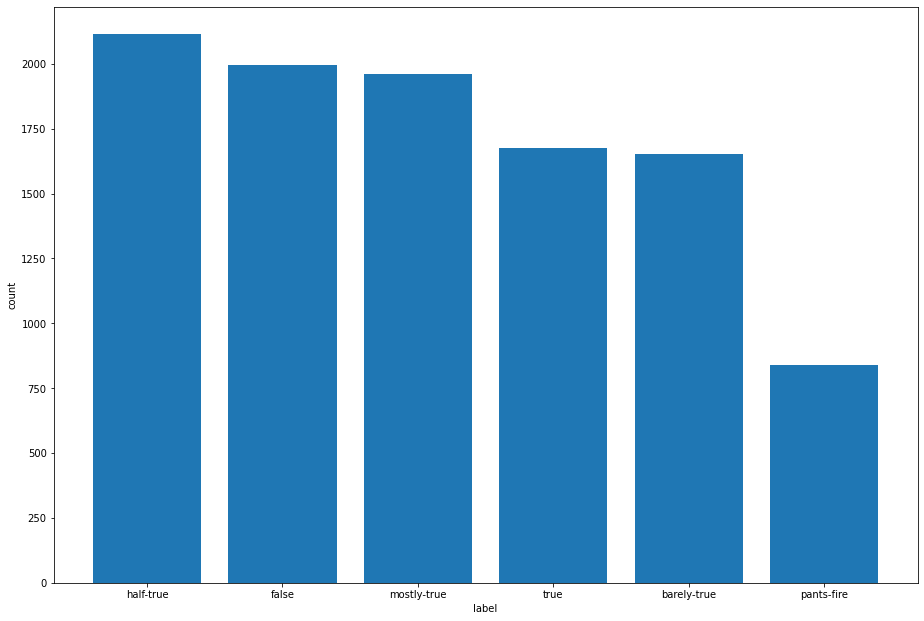

Suspicious case: 638.json
Suspicious case: 1626.json
state : {'None': 2208, 'Texas': 1009, 'Florida': 1003, 'Wisconsin': 714, 'New York': 659, 'Illinois': 558, 'Ohio': 447, 'Georgia': 433, 'Virginia': 408, 'Rhode Island': 370, 'Oregon': 242, 'New Jersey': 241, 'Massachusetts': 212, 'Arizona': 182, 'California': 163, 'Washington, D.C.': 132, 'Vermont': 98, 'Pennsylvania': 90, 'New Hampshire': 87, 'Arkansas': 84, 'Tennessee': 75, 'Kentucky': 74, 'Maryland': 69, 'Delaware': 68, 'Alaska': 65, 'North Carolina': 56, 'Minnesota': 56, 'Nevada': 48, 'Indiana': 38, 'Missouri': 36, 'New Mexico': 30, 'South Carolina': 29, 'Louisiana': 29, 'Colorado': 25, 'Connecticut': 22, 'Michigan': 22, 'Iowa': 19, 'Utah': 19, 'Kansas': 16, 'Oklahoma': 14, 'Alabama': 14, 'District of Columbia': 12, 'West Virginia': 7, 'Washington': 7, 'Washington state': 6, 'Wyoming': 4, 'Virgina': 3, 'Nebraska': 3, 'South Dakota': 3, 'Idaho': 3, 'Washington D.C.': 2, 'Unknown': 2, 'Mississippi': 2, 'North Dakota': 2, 'Maine': 2

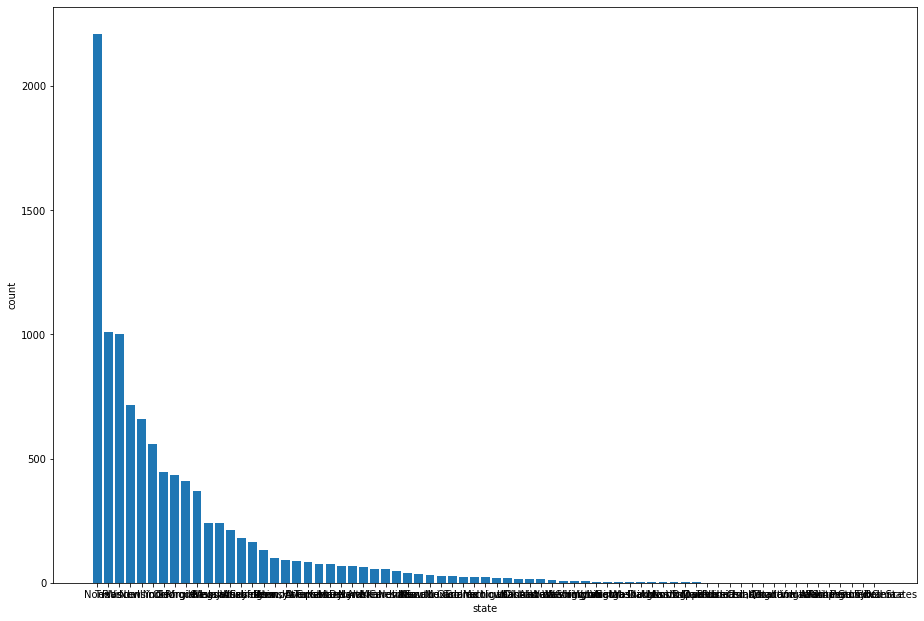

Suspicious case: 638.json
Suspicious case: 1626.json
party : {'republican': 4497, 'democrat': 3336, 'none': 1744, 'organization': 219, 'independent': 147, 'newsmaker': 56, 'libertarian': 40, 'activist': 39, 'journalist': 38, 'columnist': 35, 'talk-show-host': 26, 'state-official': 20, 'labor-leader': 11, 'tea-party-member': 10, 'business-leader': 9, 'green': 3, 'education-official': 2, 'liberal-party-canada': 1, 'government-body': 1, 'Moderate': 1, 'democratic-farmer-labor': 1, 'ocean-state-tea-party-action': 1, 'constitution-party': 1}
The total number of examples: 10238
The number of categories: 23


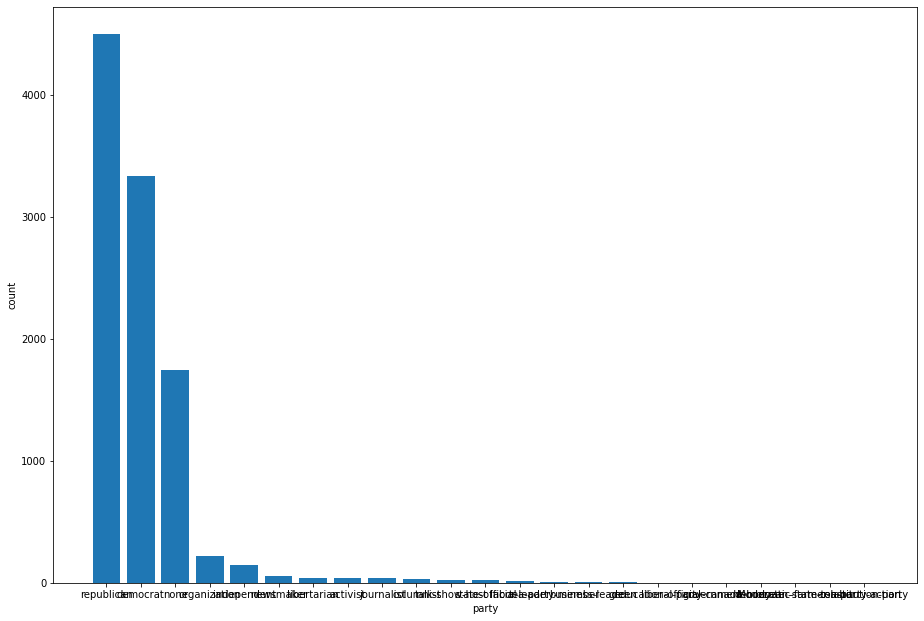

label : {'false': 263, 'mostly-true': 251, 'half-true': 248, 'barely-true': 237, 'true': 169, 'pants-fire': 116}
The total number of examples: 1284
The number of categories: 6


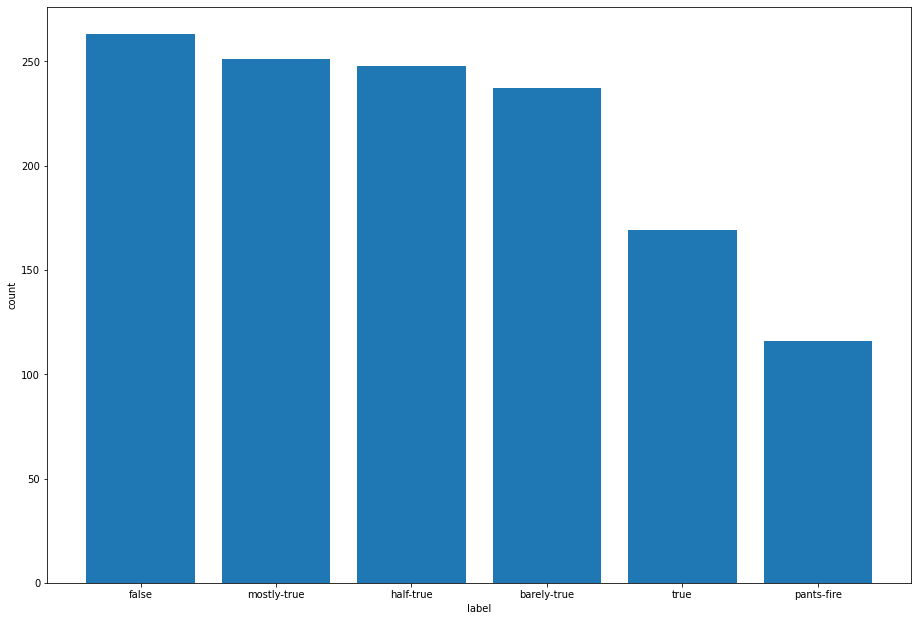

state : {'None': 279, 'Texas': 127, 'Florida': 117, 'New York': 87, 'Wisconsin': 86, 'Ohio': 71, 'Illinois': 68, 'Georgia': 64, 'Virginia': 54, 'Rhode Island': 41, 'New Jersey': 34, 'Oregon': 30, 'Arizona': 22, 'Massachusetts': 22, 'Vermont': 12, 'Arkansas': 12, 'Washington, D.C.': 12, 'California': 11, 'Kentucky': 11, 'Minnesota': 11, 'North Carolina': 11, 'New Hampshire': 10, 'Maryland': 9, 'Tennessee': 8, 'Alaska': 8, 'Pennsylvania': 7, 'Indiana': 7, 'South Carolina': 6, 'Missouri': 5, 'Delaware': 5, 'Utah': 5, 'Nevada': 5, 'Colorado': 4, 'Michigan': 4, 'Oklahoma': 4, 'Iowa': 2, 'Connecticut': 2, 'Alabama': 2, 'District of Columbia': 1, 'Russia': 1, 'Louisiana': 1, 'New Mexico': 1, 'Washington': 1, 'North Dakota': 1, 'ohio': 1, 'Kansas': 1, 'West Virginia': 1}
The total number of examples: 1284
The number of categories: 47


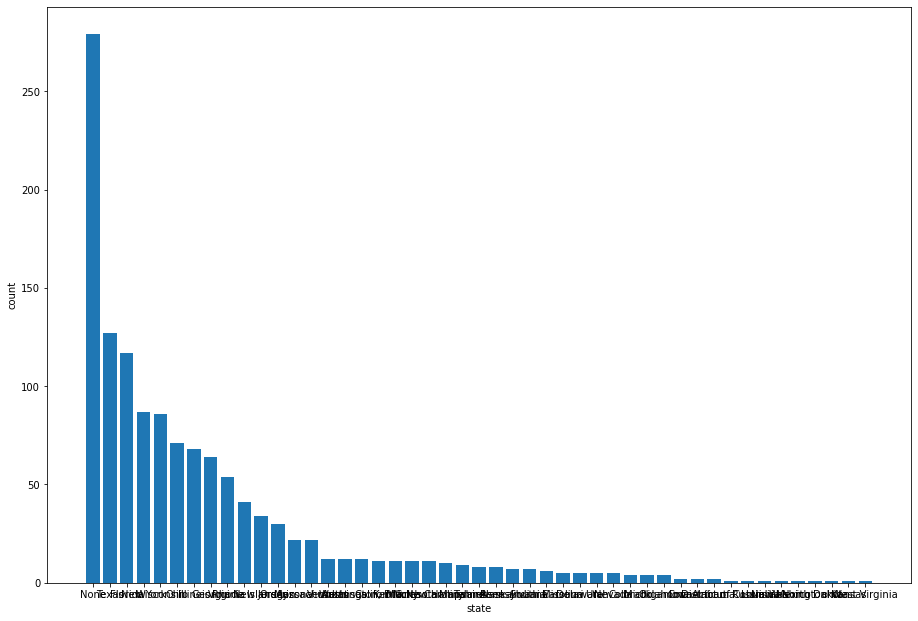

party : {'republican': 597, 'democrat': 395, 'none': 223, 'independent': 19, 'organization': 18, 'newsmaker': 7, 'libertarian': 6, 'activist': 4, 'labor-leader': 4, 'talk-show-host': 3, 'columnist': 2, 'journalist': 2, 'education-official': 1, 'county-commissioner': 1, 'business-leader': 1, 'constitution-party': 1}
The total number of examples: 1284
The number of categories: 16


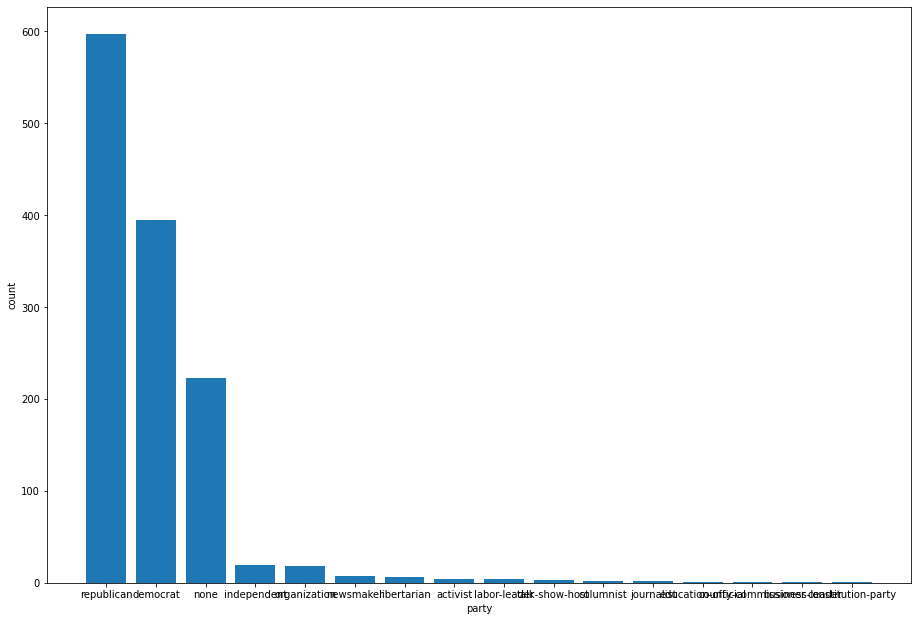

label : {'half-true': 265, 'false': 249, 'mostly-true': 241, 'barely-true': 212, 'true': 208, 'pants-fire': 92}
The total number of examples: 1267
The number of categories: 6


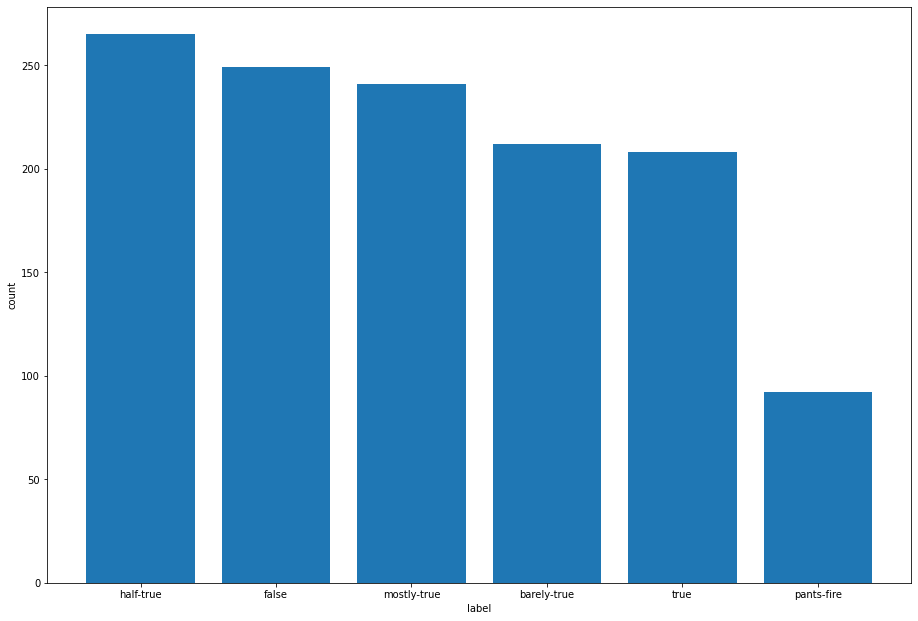

state : {'None': 262, 'Texas': 124, 'Florida': 117, 'Wisconsin': 102, 'New York': 85, 'Illinois': 69, 'Ohio': 68, 'Georgia': 56, 'Virginia': 51, 'Rhode Island': 42, 'Oregon': 38, 'New Jersey': 30, 'Arizona': 24, 'Massachusetts': 22, 'Pennsylvania': 15, 'Kentucky': 13, 'Washington, D.C.': 12, 'New Hampshire': 11, 'Delaware': 11, 'California': 10, 'Alaska': 8, 'Minnesota': 8, 'Missouri': 8, 'Maryland': 8, 'Indiana': 7, 'Vermont': 7, 'Arkansas': 7, 'New Mexico': 6, 'Tennessee': 5, 'North Carolina': 5, 'Nevada': 5, 'South Carolina': 4, 'Colorado': 4, 'Utah': 3, 'Connecticut': 3, 'Louisiana': 3, 'West Virginia': 2, 'Alabama': 2, 'Michigan': 2, 'ohio': 1, 'District of Columbia': 1, 'South Dakota': 1, 'Iowa': 1, 'Washington D.C.': 1, 'Washington': 1, 'Unknown': 1, 'Kansas': 1}
The total number of examples: 1267
The number of categories: 47


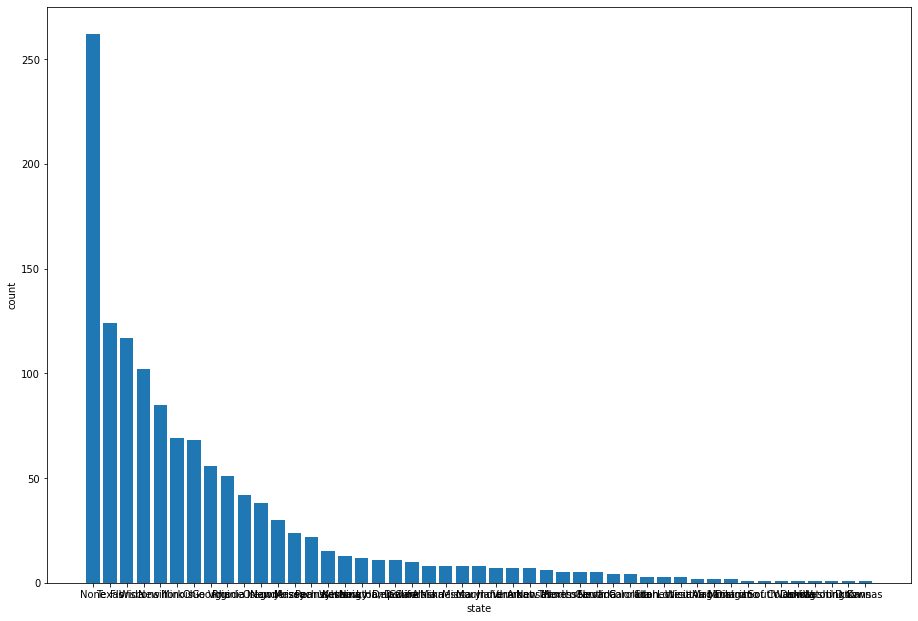

party : {'republican': 571, 'democrat': 406, 'none': 214, 'organization': 27, 'independent': 14, 'journalist': 9, 'columnist': 7, 'libertarian': 5, 'state-official': 4, 'talk-show-host': 3, 'activist': 2, 'business-leader': 1, 'government-body': 1, 'newsmaker': 1, 'county-commissioner': 1, 'constitution-party': 1}
The total number of examples: 1267
The number of categories: 16


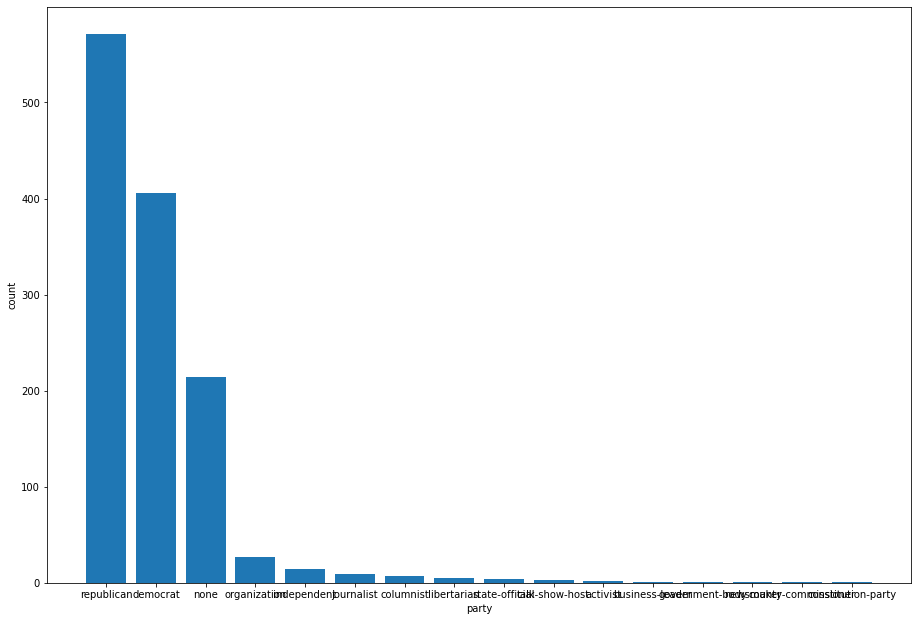

In [5]:
# caculate numbers of examples in each category: 'label', 'party', 'state' in 
# train, val, test datasets
for dataset in [train_dataset, val_dataset, test_dataset]:
  for i in [1, 6, 7]:
    categoryChecker(dataset, columns[i], i)

In [0]:
def getStatement(dataset, column_num):
  statement = []

  for row in dataset:
    if len(row) < column_num:
      statement.append('')
      print(row[0])
    else:
      statement.append(row[column_num])
  
  return statement

In [0]:
train_dataset_statement = getStatement(train_dataset, 2)
val_dataset_statement = getStatement(val_dataset, 2)

In [0]:
train_dataset_context = getStatement(train_dataset, 13)
val_dataset_context = getStatement(val_dataset, 13)

638.json
1626.json


In [0]:
def trainRunVectorizer(dataset_words):  
  cv = CountVectorizer(stop_words='english')
  doc = np.array([dataset_words])
  dataset_cv = cv.fit_transform(doc.ravel())

  # print(cv.vocabulary_)
  # print(dataset_cv.toarray())
  print(dataset_cv.shape)
  return dataset_cv, cv

def runVectorizer(dataset_words, cv):  
  doc = np.array([dataset_words])
  dataset_cv = cv.transform(doc.ravel())

  # print(cv.vocabulary_)
  # print(dataset_cv.toarray())
  print(dataset_cv.shape)
  return dataset_cv

In [0]:
train_vectorized_statement, cv_statement = trainRunVectorizer(train_dataset_statement)
val_vectorized_statement = runVectorizer(val_dataset_statement, cv_statement)

(10240, 11915)
(1284, 11915)


In [0]:
train_vectorized_context, cv_context = trainRunVectorizer(train_dataset_context)
val_vectorized_context = runVectorizer(val_dataset_context, cv_context)

(10240, 2092)
(1284, 2092)


In [0]:
def runTfidfTransformer(vectorized_statement):
  tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
  np.set_printoptions(precision=2)
  tfidf_transformed = tfidf.fit_transform(vectorized_statement)
  tfidf_transformed_array = tfidf_transformed.toarray()

  return tfidf_transformed_array

In [0]:
train_tfidfed_statement = runTfidfTransformer(train_vectorized_statement)
val_tfidfed_statement = runTfidfTransformer(val_vectorized_statement)
# print(tfidfed_statement[0])
# tfidfed_statement.shape

In [0]:
train_tfidfed_context = runTfidfTransformer(train_vectorized_context)
val_tfidfed_context = runTfidfTransformer(val_vectorized_context)
# print(tfidfed_context[0])
# tfidfed_context.shape

In [0]:
train_vectrized_features = np.column_stack((train_tfidfed_statement, train_tfidfed_context))
val_vectrized_features = np.column_stack((val_tfidfed_statement, val_tfidfed_context))
print(train_vectrized_features.shape)
print(val_vectrized_features.shape)

(10240, 14007)
(1284, 14007)


In [0]:
def categorizedDataset(dataset, column_nums=[3, 4, 5, 6, 7]):
  pre_categorized_dataset = []
  for column_num in column_nums:
    seen = {}
    categorized_row = []
    counter = 0
    for row in dataset:
      if len(row) > column_num:
        data = row[column_num]
      else:
        data = ''
      
      if data in seen:
        categorized_row.append(seen[data])
      if data not in seen:
        seen[data] = counter
        categorized_row.append(seen[data])
        counter += 1

    pre_categorized_dataset.append(categorized_row)
  
  categorized_dataset = np.array(pre_categorized_dataset).transpose()

  return categorized_dataset

In [0]:
categorized_train_dataset = categorizedDataset(train_dataset)
categorized_val_dataset = categorizedDataset(val_dataset)
# for i in range(0, 5):
#   print(len(categorized_train_dataset[i]))
print(categorized_train_dataset.shape)
print(categorized_val_dataset.shape)

(10240, 5)
(1284, 5)


In [0]:
def creditHistory(dataset, column_nums=[8, 9, 10, 11, 12]):
  pre_credit_history_dataset = []
  for row in dataset:
    credit_row = []
    for column_num in column_nums:
      if len(row) > column_num:
        data = row[column_num]
      else:
        data = 0
      credit_row.append(data)

    pre_credit_history_dataset.append(credit_row)
  
  credit_history_dataset = np.array(pre_credit_history_dataset)

  return credit_history_dataset

In [0]:
credit_history_train_dataset = creditHistory(train_dataset)
credit_history_val_dataset = creditHistory(val_dataset)
print(credit_history_train_dataset.shape)
print(credit_history_val_dataset.shape)

(10240, 5)
(1284, 5)


In [0]:
X_train = np.column_stack((train_vectrized_features, categorized_train_dataset))
X_train = np.column_stack((X_train, credit_history_train_dataset))

X_val = np.column_stack((val_vectrized_features, categorized_val_dataset))
X_val = np.column_stack((X_val, credit_history_val_dataset))
# X_train.shape

In [0]:
def getTargetDataset(dataset, column_num = 1):
  pre_target_dataset = []
  seen = {}
  counter = 0
  for row in dataset:
    if row[column_num] in seen:
        pre_target_dataset.append(seen[row[column_num]])
    if row[column_num] not in seen:
        seen[row[column_num]] = counter
        pre_target_dataset.append(seen[row[column_num]])
        counter += 1

  target_dataset = np.array(pre_target_dataset).transpose()

  target_dataset = target_dataset.astype(np.float64)
  print(target_dataset.dtype)
  return target_dataset

In [0]:
 y_train = getTargetDataset(train_dataset)
 y_val = getTargetDataset(val_dataset)
 y_train.shape

float64
float64


(10240,)

In [0]:
# from sklearn.neighbors import KNeighborsClassifier

# def trainKNN(X_train, X_val, y_train, y_val, num_neighbor, KNN_type):
#   n_neighbor = num_neighbor
#   p_value = KNN_type
#   best_KNN_val_acc = 0
#   best_n_neighbor = []
#   best_p_value = []


#   for neighbor in n_neighbor:
#     for pv in p_value:
#       KNN = KNeighborsClassifier(n_neighbors = neighbor, p = pv)
#       KNN.fit(X_train, y_train)

#       KNN_val_acc = KNN.score(X_val, y_val)

#       if KNN_val_acc > best_KNN_val_acc:
#         best_KNN_val_acc = KNN_val_acc
#         best_n_neighbor = [neighbor]
#         best_p_value = [pv]
#       elif KNN_val_acc == best_KNN_val_acc:
#         best_n_neighbor.append(n_neighbor)
#         best_p_value.append(p_value)
      
#       print('Neighbors:', neighbor, 'KNN type:', pv, 'Accuracy:', KNN_val_acc)
  
#   print('Best Accuracy:', best_KNN_val_acc, 'num of neighbors:', best_n_neighbor, 'KNN type:', best_p_value)

#   return best_n_neighbor, best_p_value

In [0]:
# trainKNN(X_train, X_val, y_train, y_val, range(1, 20), [1,2])